In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from imblearn.under_sampling import OneSidedSelection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

In [6]:
train = pd.read_csv('data/train1.csv')
test = pd.read_csv('data/test1.csv')

In [7]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.333333,0.0,0.044302,0.066667,0.800000,1.000000,0.285714,0.8,1.0,0.0,0.02174,0.0,0.397959,1.0,0.0
1,0.333333,0.0,0.048238,0.066667,0.800000,0.666667,0.071429,0.2,1.0,0.0,0.00000,0.0,0.122449,1.0,0.0
2,0.333333,1.0,0.138113,0.000000,0.533333,0.333333,0.642857,0.8,1.0,0.0,0.00000,0.0,0.397959,1.0,0.0
3,0.333333,1.0,0.151068,0.866667,0.400000,0.666667,0.642857,0.2,0.0,0.0,0.00000,0.0,0.397959,1.0,0.0
4,0.000000,1.0,0.221488,0.066667,0.800000,0.666667,0.142857,0.6,0.0,1.0,0.00000,0.0,0.397959,0.0,0.0


In [8]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.000000,1.0,0.144430,0.866667,0.400000,1.000000,0.214286,1.0,0.0,0.0,0.000000,0.0,0.397959,1.0,0.0
1,0.333333,1.0,0.051677,0.000000,0.533333,0.666667,0.285714,0.2,1.0,0.0,0.000000,0.0,0.500000,1.0,0.0
2,0.000000,0.0,0.219011,0.400000,0.733333,0.666667,0.428571,0.2,1.0,0.0,0.000000,0.0,0.397959,1.0,1.0
3,0.333333,1.0,0.099418,0.133333,0.600000,0.666667,0.214286,0.2,0.0,0.0,0.076881,0.0,0.397959,1.0,1.0
4,0.000000,0.0,0.060942,0.133333,0.600000,1.000000,0.714286,1.0,1.0,1.0,0.000000,0.0,0.295918,1.0,0.0


In [10]:
X_train = train.drop('income', axis = 1)

In [12]:
X_test = test.drop('income', axis = 1)

In [13]:
y_train = train['income']
y_test = test['income']

### XGB

In [15]:
xgb_classifier = xgb.XGBClassifier()

In [16]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
y_pred=xgb_classifier.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     12435
         1.0       0.72      0.56      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [20]:
xgboost_auc=roc_auc_score(y_test,y_pred)
r_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, r_probs)
print(xgboost_auc)

0.7466174497402092


In [21]:
probs=xgb_classifier.predict_proba(X_test)

In [22]:
probs=probs[:,1] #keep probabilities for one class

In [23]:
r_fpr, r_tpr, _=roc_curve(y_test,probs)
x=np.arange(0,1.01,0.01)

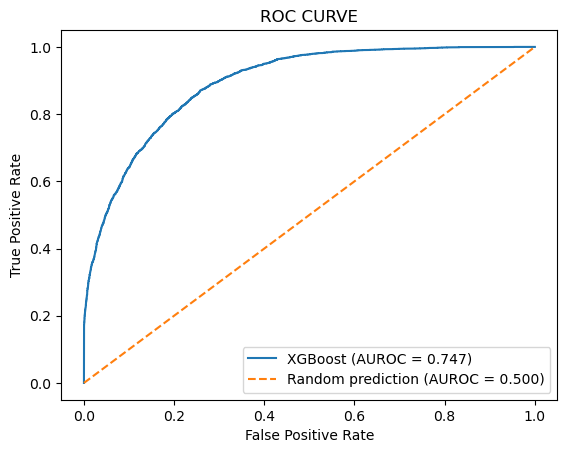

In [24]:
plt.plot(r_fpr, r_tpr, label='XGBoost (AUROC = %0.3f)' % xgboost_auc)
plt.plot(x,x, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.legend()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [25]:
rf=RandomForestClassifier()

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     12435
         1.0       0.68      0.57      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

